# GRIP: The Sparks Foundation

### Data Science and Business Analyst intern
## Name: Manav Garg

## Task 1: Prediction using Supervised ML

## Problem Statement: 
Predict the percentage of an student based on the no. of study hours.

### Import modules

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

### Reading data from remote link

In [2]:

url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


###  Plotting the distribution of scores

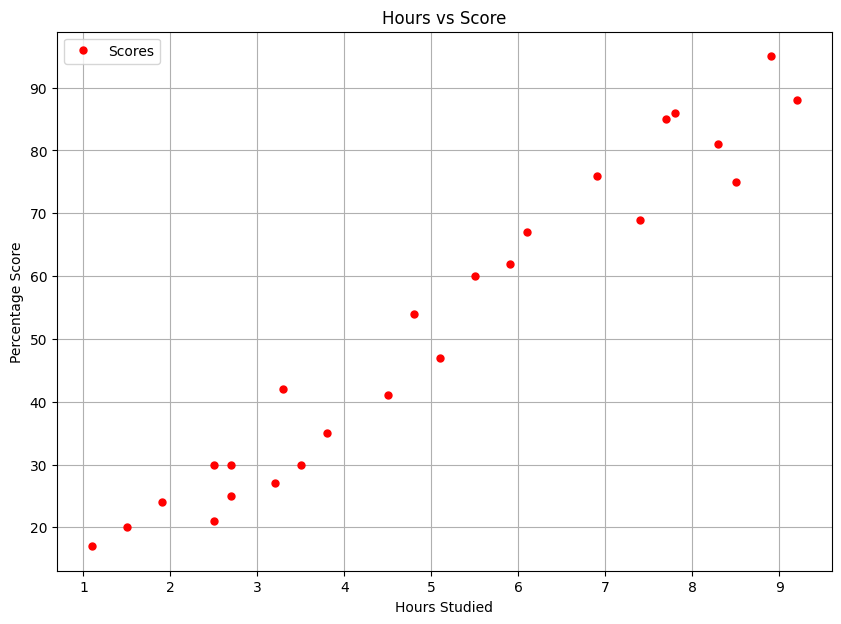

In [3]:

plt.rcParams["figure.figsize"]=[10,7]
df.plot(x='Hours', y='Scores',style='o',  color="red", markersize = 5)  
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

## **Preparing the data**


In [4]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values  

In [5]:
print(X.shape, Y.shape)

(25, 1) (25,)


## **Modelling: Logistic Regression**

### Importing model specific libraries

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### Validate the shape of train and test data

In [7]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

# Y_train.value_counts()
# Y_test.value_counts()

(20, 1)
(20,)
(5, 1)
(5,)


### Check on number of positive classes in train and test data

In [8]:
print(np.sum(Y_train))
print(np.sum(Y_test))

1079
208


## **Model Training**

In [9]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

print("Training complete")

Training complete


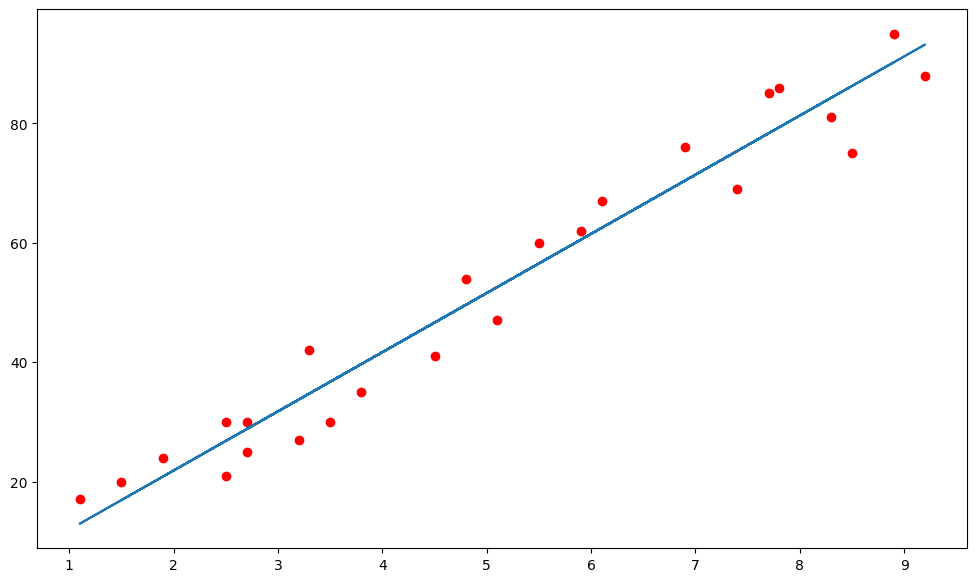

In [10]:
# Plotting the regression line
line = linreg.coef_*X+linreg.intercept_

# Plotting for the test data
plt.rcParams["figure.figsize"]=[12,7]
plt.scatter(X, Y, color='red')
plt.plot(X, line);
plt.show()

## Making Predictions

In [11]:
print(X_test) # Testing data - In Hours
#Y_train_pred = logreg.predict(X_train)
Y_test_pred = linreg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_test_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## What will be predicted score if a student studies for 9.25 hrs/ day?


In [13]:
hours = [[9.25]]
own_pred = linreg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737535


# Hence, The predicted score if a student studies for 9.25 hrs/ day = 93.69

## Evaluating the model

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_test_pred)) 

Mean Absolute Error: 4.183859899002975
